In [1]:
%reload_ext autoreload
%autoreload 2

import sys

import py21cmfast as p21c
from astropy.cosmology import Planck18

sys.path.append("..")
from dm21cm.dm_params import DMParams
from dm21cm.evolve import evolve

/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:58: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/py21cmfast/_cfg.py:42: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [3]:
return_dict = evolve(
    run_name = 'test',
    z_start = 45.,
    z_end = 5.,
    zplusone_step_factor = 1.01,
    dm_params = DMParams(
        mode='swave',
        primary='elec_delta',
        m_DM=1e8,
        sigmav=1e-23,
        struct_boost_model='erfc 1e-3',
    ),
    enable_elec = True,
    tf_version = '230629',
    
    p21c_initial_conditions = p21c.initial_conditions(
        user_params = p21c.UserParams(
            HII_DIM = 64,
            BOX_LEN = 64 * 2, # [conformal Mpc]
            N_THREADS = 32,
        ),
        cosmo_params = p21c.CosmoParams(
            OMm = Planck18.Om0,
            OMb = Planck18.Ob0,
            POWER_INDEX = Planck18.meta['n'],
            SIGMA_8 = Planck18.meta['sigma8'],
            hlittle = Planck18.h,
        ),
        random_seed = 54321,
        write = True,
    ),
    
    rerun_DH = False,
    clear_cache = True,
    use_tqdm = True,
    debug_flags = ['xraycheck'],
)

INFO:root:Using 21cmFAST version 0.1.dev1579+g6b1da6d.d20230914
INFO:root:Cache dir: /n/holyscratch01/iaifi_lab/yitians/21cmFAST-cache/test
INFO:root:TransferFunctionWrapper: Loaded photon transfer functions.
INFO:root:TransferFunctionWrapper: Loaded electron transfer functions.


z_range 0.0 50.0
delta_range -1.0 1.5
r_range 0.1 512.0


INFO:root:DarkHistoryWrapper: Found existing DarkHistory initial conditions.


after:
spin_temp.Tk_box 41.490818
spin_temp.x_e_box 0.00021329575
ionized_box.xH_box 0.99978644


  0%|          | 0/205 [00:00<?, ?it/s]

before:
spin_temp.Tk_box 16076.182
spin_temp.x_e_box 0.43308923
ionized_box.xH_box 0.56691146


  0%|          | 1/205 [00:01<04:39,  1.37s/it]

after:
spin_temp.Tk_box 40.20585
spin_temp.x_e_box 0.00021274404
ionized_box.xH_box 0.99978685


ValueError: One of the requested xi is out of bounds in dimension 1

In [3]:
return_dict['profiler'].print_summary()

xray: 0.1523 +/- 0.0359 s
bath+dm: 0.0842 +/- 0.0015 s
21cmFAST: 3.3760 +/- 8.1226 s
attenuate: 0.0037 +/- 0.0002 s
xray redshift: 0.0136 +/- 0.0077 s
prep_next: 0.0136 +/- 0.0036 s


(0.001, 100.0)

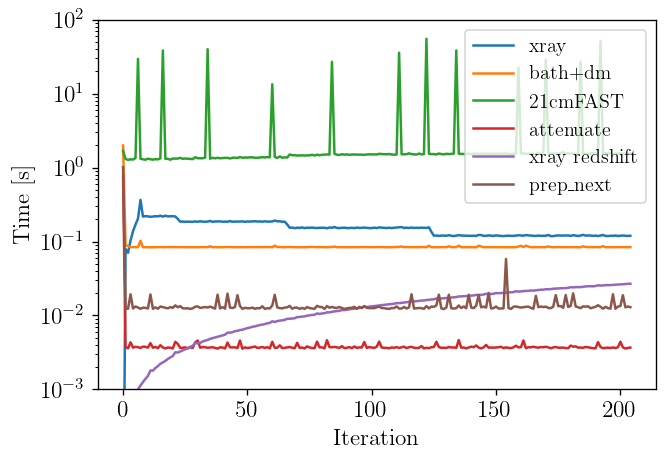

In [4]:
ax = return_dict['profiler'].plot()
ax.set_yscale('log')
ax.set_ylim(1e-3, 1e2)

(0.001, 100.0)

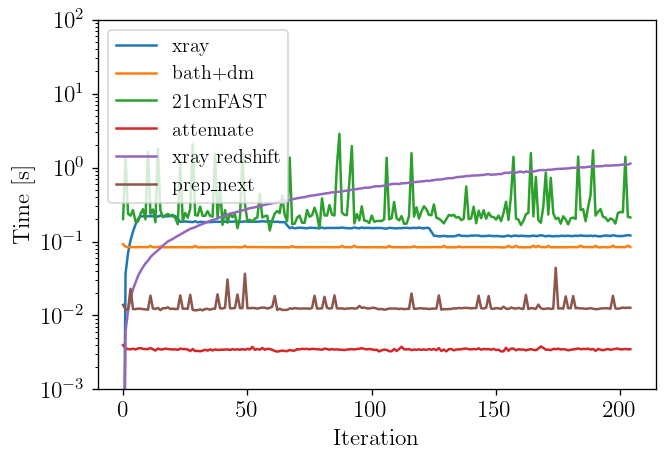

In [ ]:
ax = return_dict['profiler'].plot()
ax.set_yscale('log')
ax.set_ylim(1e-3, 1e2)

## Profiling

In [11]:
import cProfile
import pstats

In [12]:
def f():
    return_dict = evolve(
        run_name = 'test_elec',
        z_start = 45.,
        z_end = 5.,
        zplusone_step_factor = 1.01,
        dm_params = DMParams(
            mode='swave',
            primary='elec_delta',
            m_DM=1e8,
            sigmav=1e-23,
            struct_boost_model='erfc 1e-3',
        ),
        enable_elec = True,
        tf_version = '230629',
        
        p21c_initial_conditions = p21c.initial_conditions(
            user_params = p21c.UserParams(
                HII_DIM = 64,
                BOX_LEN = 64 * 2, # [conformal Mpc]
                N_THREADS = 32,
            ),
            cosmo_params = p21c.CosmoParams(
                OMm = Planck18.Om0,
                OMb = Planck18.Ob0,
                POWER_INDEX = Planck18.meta['n'],
                SIGMA_8 = Planck18.meta['sigma8'],
                hlittle = Planck18.h,
            ),
            random_seed = 54321,
            write = True,
        ),
        
        rerun_DH = False,
        clear_cache = False,
        use_tqdm = True,
    )  

In [13]:
profiler = cProfile.Profile()
profiler.enable()
f()
profiler.disable()

INFO:root:Using 21cmFAST version 0.1.dev1579+g6b1da6d.d20230914
INFO:root:Cache dir: /n/holyscratch01/iaifi_lab/yitians/21cmFAST-cache/test_elec
INFO:root:TransferFunctionWrapper: Loaded photon transfer functions.
INFO:root:TransferFunctionWrapper: Loaded electron transfer functions.
INFO:root:DarkHistoryWrapper: Found existing DarkHistory initial conditions.
100%|██████████| 205/205 [04:22<00:00,  1.28s/it]


In [14]:
stats = pstats.Stats(profiler).sort_stats('cumulative')

stats.print_stats(50)

         212341305 function calls (211718818 primitive calls) in 238.295 seconds

   Ordered by: cumulative time
   List reduced from 1191 to 50 due to restriction <50>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        2    0.000    0.000  265.278  132.639 /n/home07/yitians/.conda/envs/dm21cm/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3490(run_code)
        2    0.000    0.000  265.278  132.639 {built-in method builtins.exec}
        1    0.000    0.000  265.278  265.278 /tmp/ipykernel_1139509/368334458.py:1(<module>)
        1    0.004    0.004  265.278  265.278 /tmp/ipykernel_1139509/1538657595.py:1(f)
        1    0.318    0.318  265.161  265.161 /n/home07/yitians/dm21cm/DM21cm/notebooks/../dm21cm/evolve.py:29(evolve)
    21320    0.794    0.000  196.429    0.009 /n/home07/yitians/darkhistory/DarkHistory/darkhistory/spec/spectrum.py:1136(redshift)
      205    0.001    0.000  195.586    0.954 /n/home07/yitians/dm21cm/DM21cm/notebooks